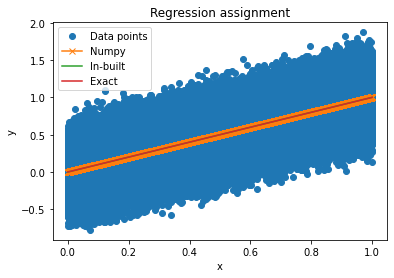

0.005439043045043945
Solution of the FAST solver: alpha =  1.0013945190022095 and beta = -0.0006042734629113644
0.38352203369140625
Solution of the NAIVE solver: alpha =  1.0013945190022204 and beta = -0.0006042734629136959


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random

# input quantities
N = int(1e6) # number of data points - 1
flagplot = True # put to false when N is too large (probems with ploting) 
sigma = 0.2 # standard deviation

# Initialize arrays for the standard python version
x = []
y = []
for i in range(0,N):
    x.append(float(i)/float(N)) # this is needed since i and N are int
    y.append(x[i]+random.gauss(0,sigma))

# Same arrays as with numpy
x_np = np.array(x)
y_np = np.array(y)

def naive(x, y):

    x_mean = 0.0
    y_mean = 0.0
    for xi,yi in zip(x,y):
        x_mean += xi/len(x)
        y_mean += yi/len(y)

    a = 0.0
    s = 0.0
    for xi, yi in zip(x, y):
        a += (xi - x_mean)*(yi - y_mean)
        s += (xi - x_mean)**2

    alpha = a/s
    beta = y_mean - alpha*x_mean

    return alpha,beta
   
def fast(x, y):
    
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    alpha = np.dot(x - x_mean, y - y_mean)/np.dot(x - x_mean, x - x_mean)
    beta = y_mean - alpha*x_mean

    return alpha,beta

def plot(x, y):

    if flagplot:
        
        plt.ion()
        plt.figure()
        plt.plot(x, y, 'o')

        alpha,beta = fast(x_np, y_np)
        plt.plot(x, alpha*x_np+beta, '-x') # numpy arrays are needed

        alpha,beta = naive(x, y)
        plt.plot(x, alpha*x_np+beta, '-') # numpy arrays are needed
        
        plt.plot([0, 1], [0, 1], '-')
        plt.legend(['Data points','Numpy','In-built','Exact'])
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Regression assignment')
        plt.show(block=True)


if __name__ == '__main__':

     plot(x,y)
     # Compute numpy version
     tic = time.time()
     alpha,beta = fast(x_np, y_np)
     print(time.time()-tic)
     print('Solution of the FAST solver: alpha =  {} and beta = {}'.format(alpha,beta))

     # Compute naive version
     tic = time.time()
     alpha,beta = naive(x, y)
     print(time.time()-tic)
     print('Solution of the NAIVE solver: alpha =  {} and beta = {}'.format(alpha,beta))
     
     # ##### or in ipython
     # from linear_regression import *
     # %timeit naive(x,y)
     # %timeit fast(x,y)

